# <i> Problem Description </i>

#### <u>Predict the Flat Resale Prices in Singapore.</u>
Investing in Flats is the biggest investment for most households in cities like Singapore which is very small but heavily urbanised. Therefore, being able to accurately value the flat prices will not only facilitate market transactions by providing valuable guidance for all market participants (be it home owners, home buyers, landlords, tenants or banks that underwrite mortgages), but also provide useful insights for policy makers and government authorities in understanding the current state of the economy.

#### Our Task:
Our ultimate goal is to create an analytical and modelling framework to predict the flat resale prices based on the quantitative and qualitative features provided in the datase.
We also have to find the insights observed from the visualizations and explain the impact of most important attributes on target attribute.
Also, if possible, derive new features from the existing features and from the domain knowledge, which may help in improving the model efficiency.

**Target attribute** : "resale_price"

#### Evaluation Metric:
Consider the ‘RMSE’ as the error metric for regression task to tune the model.

#### Extra Information:
Singapore Flats have 99-year lease.

# Initial Data Analysis

#### Variables in available dataset:

<br>month</br>
<br>town</br>
<br>flat_type</br>
<br>block</br>
<br>street_name</br>
<br>storey_range</br>
<br>floor_area_sqm</br>
<br>flat_model</br>
<br>lease_commence_date</br>
<br>remaining_lease</br>
<br>resale_price - Target Variable</br> 
<br>uniqueID - Uniquely identify each entries in the dataset</br>

Also, there's a **"building_to_MRT_distance"** dataset which has details of distance between the given buildings and the specified MRT stations. It can be used in train as well as test.

# Exploratory Data Analysis (EDA)

Since, we don't have much information readily provided to us about the columns. We can use the visualization to help us gain some insights from the provided data.

In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno #To plot NA values
import time #To check the time it took for various steps
import os #To set the current working directory
import warnings #To ignore warnings

In [2]:
# To ignore warnings
warnings.filterwarnings("ignore")

# To check the current working directory
print("Current Working Directory is "+str(os.getcwd())+"\n")
print("Datasets can be found in dataset subfolder within the current working directory.")

# import training dataset1
start_time = time.time() #Track time
train_df1 = pd.read_csv("datasets/train1-1568365584614.csv",sep=',', parse_dates = True)
print("\nIt took %s seconds to load the 1st training dataset" % (time.time() - start_time))

# import training dataset2
start_time = time.time() #Track time
train_df2 = pd.read_csv("datasets/train2-1568365601370.csv",sep=',', parse_dates = True)
print("\nIt took %s seconds to load the 2nd training dataset" % (time.time() - start_time))

# import training dataset3
start_time = time.time() #Track time
train_df3 = pd.read_csv("datasets/train3-1568365612890.csv",sep=',', parse_dates = True)
print("\nIt took %s seconds to load the 3rd training dataset" % (time.time() - start_time))

Current Working Directory is /home/nisarg/INSOFE/CUTE3-14Sep2019

Datasets can be found in dataset subfolder within the current working directory.

It took 0.3953087329864502 seconds to load the 1st training dataset

It took 0.13638019561767578 seconds to load the 2nd training dataset

It took 0.11944723129272461 seconds to load the 3rd training dataset


In [3]:
# Combine all 3 training dataset into 1 train dataset:

# Shape of individual orginal datasets:
print(train_df1.shape)  # Column "remaining_lease" is missing here.
                        # It can be calculated and is imputed in the following steps.
print(train_df2.shape)
print(train_df3.shape)

# After combining all the 3 train datasets into 1:
train_df = pd.concat([train_df1, train_df2, train_df3])
print(train_df.shape)

(52203, 11)
(37153, 12)
(32578, 12)
(121934, 12)


In [4]:
# Check 1st 3 rows of the final dataset
train_df.head(3)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID
0,172,Improved,2 ROOM,45.0,1986,2012-03,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000
1,510,Improved,2 ROOM,44.0,1980,2012-03,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001
2,610,New Generation,3 ROOM,68.0,1980,2012-03,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002


In [5]:
# Create a backup DF:
train_df_bkp = train_df.copy()
print(train_df_bkp.shape)
# Check for NA values in the final train_df:

train_df.isna().sum()

(121934, 12)


block                      0
flat_model                 0
flat_type                  0
floor_area_sqm             0
lease_commence_date        0
month                      0
remaining_lease        52203
resale_price               0
storey_range               0
street_name                0
town                       0
uniqueID                   0
dtype: int64

In [6]:
# As noted earlier, the remaining_lease column was missing in the train_df1.
# This as resulted in NaN values for the same in the final train_df.

print(train_df["remaining_lease"].isnull().sum()) # Same as number of rows in train_df1 = 52203
print("\n")
# It can be calculated as the Singapore Flats have 99-year lease.
# Therefore we can impute is as follows.

# We are adding 99 years to the lease_commence_date and subtracting the final answer from 'year' value of the month column.

# Converting month to string for split purpose.
train_df4 = train_df.assign(Mod_Data_Month = train_df.month.astype(str))
# Split year and month. Take only year.
Mod_Data_Month = train_df4["Mod_Data_Month"].str.split('-', expand = True)[0]

new_data = [train_df['lease_commence_date'].values]
res = list(map(lambda x : x + 99, new_data)) 
tr = res-pd.to_numeric(Mod_Data_Month.values)
#tr.size()
#Filling NA values based on above calculations
#print(train_df.shape)
train_df["mod_remaining_lease"] = (tr.reshape(121934,1).astype('int'))
print(train_df.dtypes)
print("\n")
print(train_df.isnull().sum())

52203


block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
remaining_lease         object
resale_price           float64
storey_range            object
street_name             object
town                    object
uniqueID                 int64
mod_remaining_lease      int64
dtype: object


block                      0
flat_model                 0
flat_type                  0
floor_area_sqm             0
lease_commence_date        0
month                      0
remaining_lease        52203
resale_price               0
storey_range               0
street_name                0
town                       0
uniqueID                   0
mod_remaining_lease        0
dtype: int64


In [7]:
# Drop remaining_lease as it's now calculated in mod_remaining_lease:
train_df = train_df.drop(columns=['remaining_lease'], axis=1)
train_df.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
resale_price           float64
storey_range            object
street_name             object
town                    object
uniqueID                 int64
mod_remaining_lease      int64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

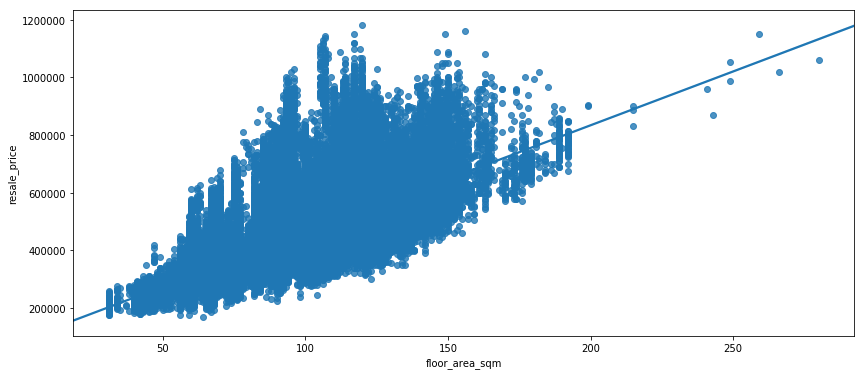

In [9]:
# Relation with respect to floor area sqm
# With regression fit:
plt.figure(figsize=(14, 6))
sns.regplot(x=train_df["floor_area_sqm"], y=train_df["resale_price"], fit_reg=True)
plt.show()

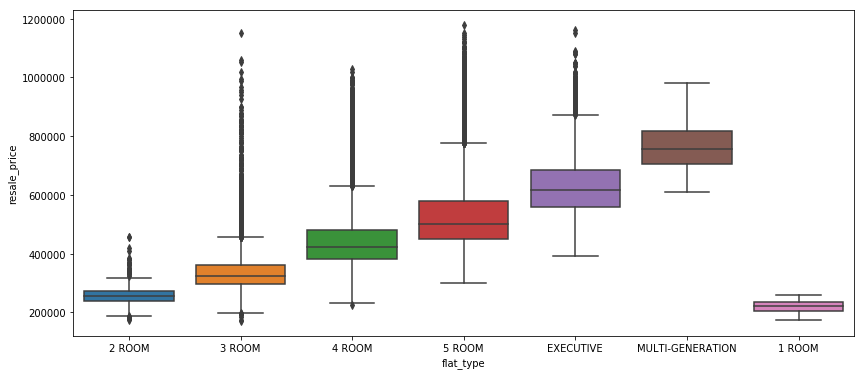

In [10]:
# Checking resale values with respect to flat type:
plt.figure(figsize=(14, 6))
sns.boxplot(x=train_df["flat_type"], y=train_df["resale_price"])
plt.show()

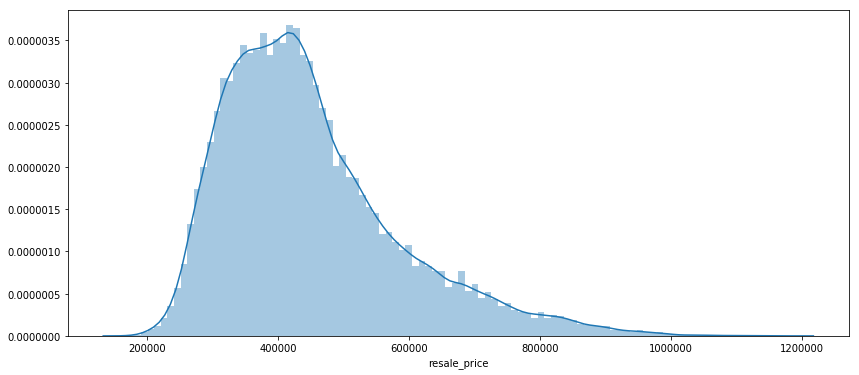

In [11]:
# Checking distribution plot to get some more insights:
plt.figure(figsize=(14, 6))
sns.distplot(a=train_df["resale_price"], bins = 100)
plt.show()

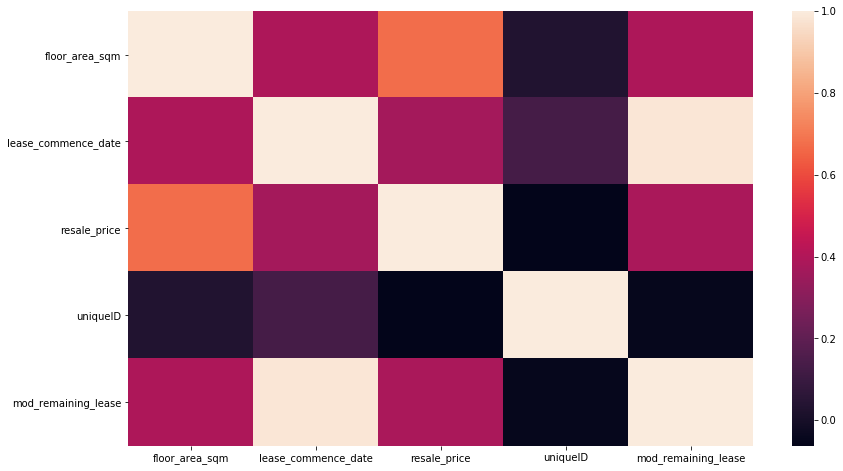

In [12]:
# calculate the correlation matrix
corr = train_df.corr()

# plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<i>The color between floor area and the resale price are the lightest among other combinations. It means that floor area and resale price are highly correlated in a positive way i.e. higher floor area, higher resale price.
However, Modified Remaining Lease years and resale price have very low correlation, which means toilet number might not be very useful in predicting the resale price of the flat.
Similar negative relation for lease commence date(makes sense, since Mod_remaining_lease is derived from the same) and unique Id can be seen. </i>

In [13]:
# Let's check the data description:
train_df.describe(include='all')
train_df_bkp_2 = train_df.copy()

**Feature engineering on town premium here:**

In [14]:
# We can do some feature engineering on town premium here:

temp_town_df = train_df.groupby(['town'],as_index=False).median()[['town','resale_price']]

temp_town_df['town_premium'] = temp_town_df['resale_price']-temp_town_df['resale_price'].median()
temp_town_df.describe()

,resale_price,town_premium
count,26.000000,26.000000
mean,445924.076923,26924.076923
std,76781.044983,76781.044983
min,355000.000000,-64000.000000
25%,396250.000000,-22750.000000
50%,419000.000000,0.000000
75%,468250.000000,49250.000000
max,699000.000000,280000.000000


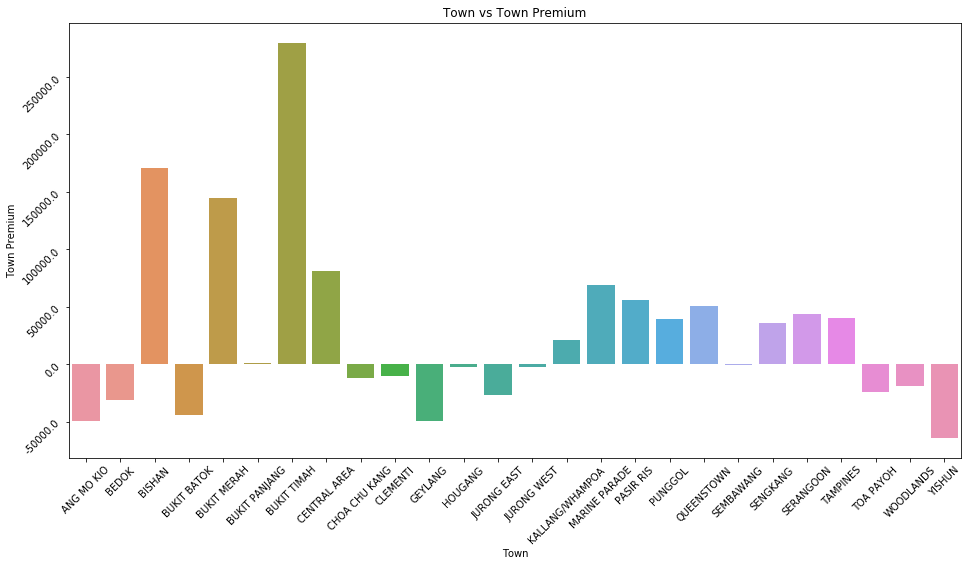

In [15]:
# Town with highest premium:

plt.figure(figsize=(16, 8))
bar = sns.barplot(x=temp_town_df['town'],y=temp_town_df['town_premium'].values)
loc, labels = plt.xticks()
loc, y_labels = plt.yticks()
bar.set_xticklabels(labels, rotation=45)
bar.set_yticklabels(loc, rotation=45)
plt.xlabel("Town")
plt.ylabel("Town Premium")
plt.title("Town vs Town Premium")
plt.show()

**Feature engineering on Flat model with highest premium:**

In [16]:
# We can do some feature engineering on town premium here:

temp_flat_model_df = train_df.groupby(['flat_model'],as_index=False).median()[['flat_model','resale_price']]

temp_flat_model_df['flat_model_premium'] = temp_flat_model_df['resale_price']-temp_flat_model_df['resale_price'].median()
print(temp_flat_model_df.head())
print(temp_flat_model_df.shape)
temp_flat_model_df['flat_model_premium'].describe()

      flat_model  resale_price  flat_model_premium
0         2-room      240000.0           -410000.0
1  Adjoined flat      720000.0             70000.0
2      Apartment      605000.0            -45000.0
3           DBSS      770000.0            120000.0
4       Improved      450000.0           -200000.0
(21, 3)


count        21.000000
mean     -57478.857143
std      212599.955286
min     -410000.000000
25%     -270000.000000
50%           0.000000
75%      106944.000000
max      330000.000000
Name: flat_model_premium, dtype: float64

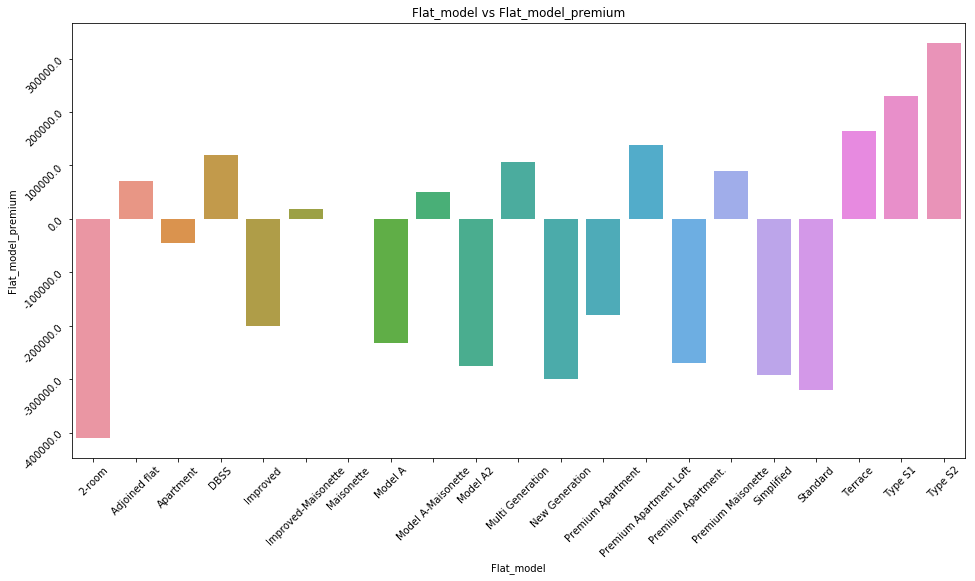

In [17]:
# Flat model with highest premium:

plt.figure(figsize=(16, 8))
bar = sns.barplot(x=temp_flat_model_df['flat_model'],y=temp_flat_model_df['flat_model_premium'].values)
loc, labels = plt.xticks()
loc, y_labels = plt.yticks()
bar.set_xticklabels(labels, rotation=45)
bar.set_yticklabels(loc, rotation=45)
plt.xlabel("Flat_model")
plt.ylabel("Flat_model_premium")
plt.title("Flat_model vs Flat_model_premium")
plt.show()

**Feature engineering on Storey_Range:**

In [18]:
# Feature engineering on Storey_Range:
print(train_df["storey_range"].unique())

# Function to pre-process the storey range:
def cal_mean_floor(f):
    return int((int(f[:2]) + int(f[-2:])) * 0.5)

# Replace the storey range to it's mean values:
temp_storey_range=pd.DataFrame({"Storey_range":train_df['storey_range']})
temp_storey_range['storey']=train_df["storey_range"].map(lambda f: cal_mean_floor(f))
temp_storey_range.head()

['06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20' '21 TO 25' '26 TO 30'
 '36 TO 40' '31 TO 35' '04 TO 06' '01 TO 03' '07 TO 09' '10 TO 12'
 '13 TO 15' '19 TO 21' '22 TO 24' '16 TO 18' '25 TO 27' '28 TO 30'
 '37 TO 39' '34 TO 36' '31 TO 33' '40 TO 42' '46 TO 48' '43 TO 45'
 '49 TO 51']


,Storey_range,storey
0,06 TO 10,8
1,01 TO 05,3
2,06 TO 10,8
3,01 TO 05,3
4,06 TO 10,8


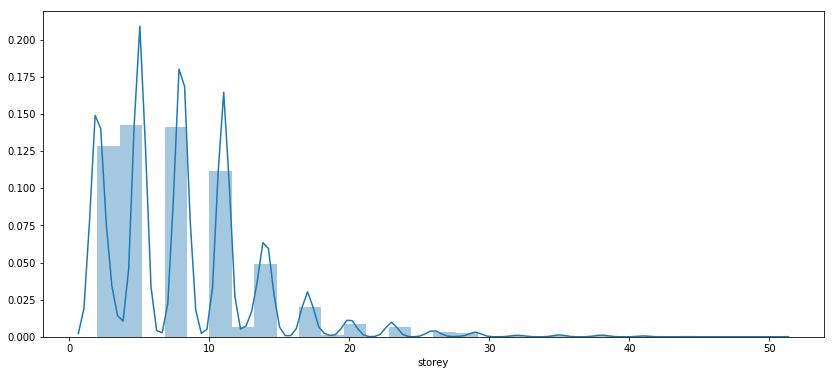

In [19]:
# Majority mean storey's are between 2 to 10:

plt.figure(figsize=(14, 6))
sns.distplot(a=temp_storey_range["storey"], bins = 30)
plt.show()

In [20]:
train_df.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
resale_price           float64
storey_range            object
street_name             object
town                    object
uniqueID                 int64
mod_remaining_lease      int64
dtype: object

In [21]:
b = temp_flat_model_df.set_index('flat_model').T.to_dict('list')
print(b)

train_df["flat_model_premium"]=train_df['flat_model'].map(b)
c=train_df["flat_model_premium"].values

res2 = [i[1] for i in c]
train_df["flat_model_premium"]=res2


#print(temp_town_df['town'])
b = temp_town_df.set_index('town').T.to_dict('list')
#print(b)

train_df["town_premium"]=train_df['town'].map(b)
c=train_df["town_premium"].values

res2 = [i[1] for i in c]
train_df["town_premium"]=res2


#print(res2)

#print(temp_flat_model_df.head())
#print(train_df[["flat_model_premium","flat_model"]])
#t_f_a = train_final_address[["Mod_addr","Distance from Downtown MRT station"]]
#train_address_imp['Mod_addr'] = pd.concat(train_address_imp["block"],train_address_imp["street_name"])
#result = pd.merge(train_df,
#                  t_f_a,
#                  on='Mod_addr')

train_df['storey'] = temp_storey_range['storey']
#train_df['flat_model_premium'] = temp_flat_model_df['flat_model_premium']
#train_df['town_premium'] = temp_town_df['town_premium']
print('\n\n\n')
print(train_df.dtypes)
train_df.head()

{'2-room': [240000.0, -410000.0], 'Adjoined flat': [720000.0, 70000.0], 'Apartment': [605000.0, -45000.0], 'DBSS': [770000.0, 120000.0], 'Improved': [450000.0, -200000.0], 'Improved-Maisonette': [669000.0, 19000.0], 'Maisonette': [650000.0, 0.0], 'Model A': [417000.0, -233000.0], 'Model A-Maisonette': [700000.0, 50000.0], 'Model A2': [375000.0, -275000.0], 'Multi Generation': [756944.0, 106944.0], 'New Generation': [350000.0, -300000.0], 'Premium Apartment': [470000.0, -180000.0], 'Premium Apartment Loft': [788000.0, 138000.0], 'Premium Apartment.': [380000.0, -270000.0], 'Premium Maisonette': [740000.0, 90000.0], 'Simplified': [357000.0, -293000.0], 'Standard': [330000.0, -320000.0], 'Terrace': [815000.0, 165000.0], 'Type S1': [880000.0, 230000.0], 'Type S2': [980000.0, 330000.0]}




block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
resale_price     

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,uniqueID,mod_remaining_lease,flat_model_premium,town_premium,storey
0,172,Improved,2 ROOM,45.0,1986,2012-03,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000,73,-200000.0,-49000.0,8
1,510,Improved,2 ROOM,44.0,1980,2012-03,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001,67,-200000.0,-49000.0,3
2,610,New Generation,3 ROOM,68.0,1980,2012-03,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002,67,-300000.0,-49000.0,8
3,474,New Generation,3 ROOM,67.0,1984,2012-03,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003,71,-300000.0,-49000.0,3
4,604,New Generation,3 ROOM,67.0,1980,2012-03,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004,67,-300000.0,-49000.0,8


In [22]:
train_df.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
resale_price           float64
storey_range            object
street_name             object
town                    object
uniqueID                 int64
mod_remaining_lease      int64
flat_model_premium     float64
town_premium           float64
storey                   int64
dtype: object

**Feature engineering on Street name, Block, Building_to_mrt_distance i.e. address here:**

In [23]:
'''
# To check max variance provided by any MRT station.
#new_mrt = pd.read_csv('datasets/building_to_mrt_distance-1568365651170.csv',sep=',')
#new_mrt = new_mrt.drop(['Building'],axis=1)
#res3 = (new_mrt.var()/10e+6).to_list()

#print(res3.index(min(res3)))
#print(new_mrt.iloc[:,58])
#print(pd.DataFrame(new_mrt.columns,res3).iloc[83])
# Answer is Changi Airport MRT station
# We select Marymount MRT station for min var
'''

"\n# To check max variance provided by any MRT station.\n#new_mrt = pd.read_csv('datasets/building_to_mrt_distance-1568365651170.csv',sep=',')\n#new_mrt = new_mrt.drop(['Building'],axis=1)\n#res3 = (new_mrt.var()/10e+6).to_list()\n\n#print(res3.index(min(res3)))\n#print(new_mrt.iloc[:,58])\n#print(pd.DataFrame(new_mrt.columns,res3).iloc[83])\n# Answer is Changi Airport MRT station\n# We select Marymount MRT station for min var\n"

In [24]:
# Import building distance from MRT station dataset:

train_address = pd.read_csv('datasets/building_to_mrt_distance-1568365651170.csv',sep=',')

In [25]:
# We are taking Bishan MRT station because as per the major singapore property-news agencies,
# it's one of the most popular MRT stations in Singapore.
# It's mean area price is $1508
# Source: https://www.edgeprop.sg/property-news/which-are-most-popular-mrt-stations-singapore

#train_address_imp = train_address[['Building','Downtown MRT station']]
train_address_imp = train_address[['Building','Marymount MRT station']]

In [26]:
train_address_imp.head()

,Building,Marymount MRT station
0,ANCHORVALE ST BLK 331C,7647.378404
1,PUNGGOL WAY BLK 266B,9065.255502
2,YISHUN AVE 9 BLK 318A,9475.032587
3,YISHUN AVE 9 BLK 318B,9425.460564
4,YISHUN AVE 9 BLK 315A,9280.867654


In [27]:
# Calculate distance from reference MRT Station:

train_df6 = train_address_imp.assign(street_name = train_address_imp.Building.astype(str))
# Split Building address into street name and block:
street_name = train_df6["street_name"].str.split(' BLK ', expand = True)[0]
block = train_df6["street_name"].str.split(' BLK ', expand = True)[1]
#print(street_name)
#print(block)
train_final_address = pd.DataFrame({"block":block,"street_name":street_name, "Distance from Marymount MRT station":train_address_imp['Marymount MRT station']})
print(train_final_address.head(1))

  block    street_name  Distance from Marymount MRT station
0  331C  ANCHORVALE ST                          7647.378404


In [28]:
# Merge our train data with the distance data from reference MRT:

train_df["Mod_addr"] = train_df["block"].map(str) + train_df["street_name"].map(str)
#print(train_df["Mod_addr"])
#train_df['Mod_addr'] = pd.concat(train_df["block"],train_df["street_name"])

train_final_address["Mod_addr"] =  train_final_address["block"].map(str)+train_final_address["street_name"].map(str)
#print(train_final_address["Mod_addr"])
t_f_a = train_final_address[["Mod_addr","Distance from Marymount MRT station"]]
#train_address_imp['Mod_addr'] = pd.concat(train_address_imp["block"],train_address_imp["street_name"])
result = pd.merge(train_df,
                  t_f_a,
                  on='Mod_addr')
#result = train_df.merge(train_final_address["Distance from Bishan MRT station"],on='Mod_addr')
result.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,uniqueID,mod_remaining_lease,flat_model_premium,town_premium,storey,Mod_addr,Distance from Marymount MRT station
0,172,Improved,2 ROOM,45.0,1986,2012-03,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000,73,-200000.0,-49000.0,8,172ANG MO KIO AVE 4,2865.153085
1,172,Improved,3 ROOM,60.0,1986,2012-04,302500.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,102362,73,-200000.0,-49000.0,8,172ANG MO KIO AVE 4,2865.153085
2,172,Improved,3 ROOM,60.0,1986,2012-05,295000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,104517,73,-200000.0,-49000.0,8,172ANG MO KIO AVE 4,2865.153085
3,172,Improved,2 ROOM,45.0,1986,2012-06,259000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,106838,73,-200000.0,-49000.0,5,172ANG MO KIO AVE 4,2865.153085
4,172,Improved,2 ROOM,45.0,1986,2012-08,263000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,111011,73,-200000.0,-49000.0,8,172ANG MO KIO AVE 4,2865.153085


In [29]:
result.dtypes

block                                   object
flat_model                              object
flat_type                               object
floor_area_sqm                         float64
lease_commence_date                      int64
month                                   object
resale_price                           float64
storey_range                            object
street_name                             object
town                                    object
uniqueID                                 int64
mod_remaining_lease                      int64
flat_model_premium                     float64
town_premium                           float64
storey                                   int64
Mod_addr                                object
Distance from Marymount MRT station    float64
dtype: object

In [30]:
result["flat_type"].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', 'EXECUTIVE', '5 ROOM',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

# Data Preprocessing:

In [31]:
result = pd.get_dummies(result, columns=['flat_type'], drop_first=True)
result.head()

,block,flat_model,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,uniqueID,...,town_premium,storey,Mod_addr,Distance from Marymount MRT station,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
0,172,Improved,45.0,1986,2012-03,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000,...,-49000.0,8,172ANG MO KIO AVE 4,2865.153085,1,0,0,0,0,0
1,172,Improved,60.0,1986,2012-04,302500.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,102362,...,-49000.0,8,172ANG MO KIO AVE 4,2865.153085,0,1,0,0,0,0
2,172,Improved,60.0,1986,2012-05,295000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,104517,...,-49000.0,8,172ANG MO KIO AVE 4,2865.153085,0,1,0,0,0,0
3,172,Improved,45.0,1986,2012-06,259000.0,04 TO 06,ANG MO KIO AVE 4,ANG MO KIO,106838,...,-49000.0,5,172ANG MO KIO AVE 4,2865.153085,1,0,0,0,0,0
4,172,Improved,45.0,1986,2012-08,263000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,111011,...,-49000.0,8,172ANG MO KIO AVE 4,2865.153085,1,0,0,0,0,0


In [32]:
result.isna().sum()

block                                  0
flat_model                             0
floor_area_sqm                         0
lease_commence_date                    0
month                                  0
resale_price                           0
storey_range                           0
street_name                            0
town                                   0
uniqueID                               0
mod_remaining_lease                    0
flat_model_premium                     0
town_premium                           0
storey                                 0
Mod_addr                               0
Distance from Marymount MRT station    0
flat_type_2 ROOM                       0
flat_type_3 ROOM                       0
flat_type_4 ROOM                       0
flat_type_5 ROOM                       0
flat_type_EXECUTIVE                    0
flat_type_MULTI-GENERATION             0
dtype: int64

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split 
x=result.drop(['resale_price','storey_range','Mod_addr','month','lease_commence_date','town','flat_model','block','street_name'],axis=1)
y=result['resale_price']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 729)

# Import Test Dataset

In [34]:
# Import test data:
test_df = pd.read_csv("datasets/test-1568365637039.csv",sep=",")

In [35]:
#print(test_df.shape)
# Converting month to string for split purpose.
test_df_ = test_df.assign(Mod_Data_Month = result.month.astype(str))
# Split year and month. Take only year.
Mod_Data_Month = test_df_["Mod_Data_Month"].str.split('-', expand = True)[0]

new_data = [test_df['lease_commence_date'].values]
res = list(map(lambda x : x + 99, new_data)) 
tr = res-pd.to_numeric(Mod_Data_Month.values)
#print(tr.size)
#Filling NA values based on above calculations
#print(test_df_.shape)
#print(Mod_Data_Month.shape)
test_df["mod_remaining_lease"] = (tr.reshape(21846,1).astype('int'))

test_df = test_df.drop(columns=['remaining_lease'], axis=1)


In [36]:
temp_town_df = train_df.groupby(['town'],as_index=False).median()[['town','resale_price']]
temp_town_df['town_premium'] = temp_town_df['resale_price']-temp_town_df['resale_price'].median()

temp_flat_model_df = train_df.groupby(['flat_model'],as_index=False).median()[['flat_model','resale_price']]
temp_flat_model_df['flat_model_premium'] = temp_flat_model_df['resale_price']-temp_flat_model_df['resale_price'].median()

# Replace the storey range to it's mean values:
temp_storey_range=pd.DataFrame({"Storey_range":test_df['storey_range']})
temp_storey_range['storey']=test_df["storey_range"].map(lambda f: cal_mean_floor(f))

b = temp_flat_model_df.set_index('flat_model').T.to_dict('list')
test_df["flat_model_premium"]=test_df['flat_model'].map(b)
c=test_df["flat_model_premium"].values
res2 = [i[1] for i in c]
test_df["flat_model_premium"]=res2

b = temp_town_df.set_index('town').T.to_dict('list')
test_df["town_premium"]=test_df['town'].map(b)
c=test_df["town_premium"].values
res2 = [i[1] for i in c]
test_df["town_premium"]=res2

test_df['storey'] = temp_storey_range['storey']

In [37]:
# Merge our train data with the distance data from reference MRT:
test_df["Mod_addr"] = test_df["block"].map(str) + test_df["street_name"].map(str)

result = pd.merge(test_df,
                  t_f_a,
                  on='Mod_addr')

In [38]:
result.isna().sum()

month                                  0
town                                   0
flat_type                              0
block                                  0
street_name                            0
storey_range                           0
floor_area_sqm                         0
flat_model                             0
lease_commence_date                    0
uniqueID                               0
mod_remaining_lease                    0
flat_model_premium                     0
town_premium                           0
storey                                 0
Mod_addr                               0
Distance from Marymount MRT station    0
dtype: int64

In [39]:
result.dtypes

month                                   object
town                                    object
flat_type                               object
block                                   object
street_name                             object
storey_range                            object
floor_area_sqm                         float64
flat_model                              object
lease_commence_date                      int64
uniqueID                                 int64
mod_remaining_lease                      int64
flat_model_premium                     float64
town_premium                           float64
storey                                   int64
Mod_addr                                object
Distance from Marymount MRT station    float64
dtype: object

In [40]:
result = pd.get_dummies(result, columns=['flat_type'], drop_first=True)

In [41]:
x=result.drop(['storey_range','Mod_addr','month','lease_commence_date','town','flat_model','block','street_name'],axis=1)

In [42]:
x.dtypes

floor_area_sqm                         float64
uniqueID                                 int64
mod_remaining_lease                      int64
flat_model_premium                     float64
town_premium                           float64
storey                                   int64
Distance from Marymount MRT station    float64
flat_type_2 ROOM                         uint8
flat_type_3 ROOM                         uint8
flat_type_4 ROOM                         uint8
flat_type_5 ROOM                         uint8
flat_type_EXECUTIVE                      uint8
flat_type_MULTI-GENERATION               uint8
dtype: object

# Create Model:

## Linear Model:

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [45]:
linearRegressor = LinearRegression()
#print(yTrain.shape)

linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)


In [46]:
r_square = linearRegressor.score(xTest, yTest)
mse = mean_squared_error(yPrediction, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)


0.7110250856684496 5321301906.305207 72947.25427529954


In [47]:
ytest_Prediction = linearRegressor.predict(x)

## Create Decision-Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeRegressor(), param_grid,refit=True)
tree.fit(xTrain, yTrain)
yPrediction = tree.predict(xTest)
r_square = tree.score(xTest, yTest)
mse = mean_squared_error(yPrediction, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

y_test_pred = tree.predict(x)

0.8457764023242464 2839936214.5589304 53291.051918299854


## Create LASSO Model

In [50]:
from sklearn.linear_model import Lasso

In [51]:
Lasso = Lasso(alpha = 1)
parameters = {'alpha':np.logspace(-4, -1.5, 10)}
Lasso_regressor = GridSearchCV(Lasso,parameters,scoring="neg_mean_squared_error",cv=5,refit=True)
Lasso_regressor.fit(xTrain,yTrain)
print(Lasso_regressor.best_params_)
print(Lasso_regressor.best_score_)
yPrediction = Lasso_regressor.predict(xTest)
r_square = Lasso_regressor.score(xTest, yTest)
mse = mean_squared_error(yPrediction, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

y_test_pred_LASSO = Lasso_regressor.predict(x)

{'alpha': 0.0001}
-5382600140.629209
-5321884130.310309 5321884130.310309 72951.24488526779


## Random Forest:

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [53]:
randFor = RandomForestRegressor(n_estimators=150, random_state=783, oob_score=True, warm_start=True, n_jobs=2)
randFor.fit(xTrain, yTrain)
yPrediction = randFor.predict(xTest)
r_square = randFor.score(xTest, yTest)
mse = mean_squared_error(yPrediction, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

yPrediction_rand_for = randFor.predict(x)

0.9637223951963579 668030607.5852724 25846.288081372004


## Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, alpha=0.5, random_state=351, warm_start=True)
grad_reg.fit(xTrain, yTrain)
grad_pred = grad_reg.predict(xTest)

r_square = grad_reg.score(xTest, yTest)
mse = mean_squared_error(grad_pred, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

0.925841308964454 1365588376.0338728 36953.86821476032


## AdaBoostRegressor

In [55]:
# Ada-Boosting using Random forest
from sklearn.ensemble import AdaBoostRegressor
randFor = RandomForestRegressor(oob_score=True, warm_start=True, min_samples_split=2, max_depth=40, n_jobs=3)
ada_regr = AdaBoostRegressor(random_state=783, n_estimators=50, base_estimator=randFor, loss='square', learning_rate=0.1)
ada_regr.fit(xTrain, yTrain)  
ada_pred = ada_regr.predict(xTest)

r_square = ada_regr.score(xTest, yTest)
mse = mean_squared_error(ada_pred, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

0.96531190528546 638760720.6582518 25273.716004146518


In [59]:
# Ada-Boosting using Decision Tree:
from sklearn.ensemble import AdaBoostRegressor
ada_DT = DecisionTreeRegressor(presort=True, max_depth=15)
ada_regr_dt = AdaBoostRegressor(random_state=783, n_estimators=50, base_estimator=ada_DT, loss='square', learning_rate=0.1)
ada_regr_dt.fit(xTrain, yTrain)  
ada_pred_dt = ada_regr_dt.predict(xTest)

r_square = ada_regr_dt.score(xTest, yTest)
mse = mean_squared_error(ada_pred_dt, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

0.9527606446961536 869884751.1122594 29493.80869118567


## XGBosst Regressor

0.9680788160125513 587809698.280735 24244.78703310745


Text(0, 0.5, 'Predicted Y')

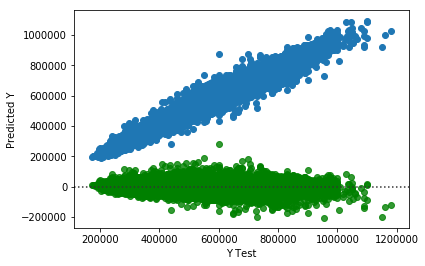

In [70]:
from xgboost import XGBRegressor
model = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.075,
                     max_depth = 22, alpha = 20, gamma = 0.02, n_estimators = 100, eta=0.03)
model.fit(xTrain, yTrain)
y_pred = model.predict(xTest)
r_square = model.score(xTest, yTest)
mse = mean_squared_error(y_pred, yTest)
rmse = mse ** 0.5
print(r_square,mse,rmse)

#sns.distplot((yTest-y_pred),bins=50)
sns.residplot(yTest,y_pred, color="green")

plt.scatter(yTest,y_pred)
plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

# Checking NaN values in Prediction output:

In [71]:
#--------------------------------------------------------------------#
# Checking for NaN in Predictions of XBoost Model:
#--------------------------------------------------------------------#


check_df = pd.DataFrame()
check_df['YTEST']=pd.Series(yTest)
check_df['YPRED']=pd.Series(y_pred)
print(check_df.head())
check_df.shape

           YTEST         YPRED
89413   520000.0           NaN
20455   420000.0  334293.90625
102907  480000.0           NaN
67836   495000.0           NaN
57187   347000.0           NaN


(40645, 2)

In [72]:
check_df['Index']=yTest.index
check_df.head()

,YTEST,YPRED,Index
89413,520000.0,NaN,89413
20455,420000.0,334293.90625,20455
102907,480000.0,NaN,102907
67836,495000.0,NaN,67836
57187,347000.0,NaN,57187


In [73]:
xTest[xTest.index==102907]

,floor_area_sqm,uniqueID,mod_remaining_lease,flat_model_premium,town_premium,storey,Distance from Marymount MRT station,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
102907,110.0,158363,84,-200000.0,-2112.0,8,15235.6132,0,0,0,1,0,0


In [74]:
yTest[yTest.index==102907]

102907    480000.0
Name: resale_price, dtype: float64

In [75]:
#xTest[xTest.index==102907]
#result[result.uniqueID==158363]
#result[result.index==102907]
#check_df_2[check_df_2.index==102907]

In [76]:
check_df.isna().sum()

YTEST        0
YPRED    26982
Index        0
dtype: int64

In [77]:
y.shape

(121934,)

In [78]:
xTest.shape

(40645, 13)

In [79]:
xTest.isna().sum()

floor_area_sqm                         0
uniqueID                               0
mod_remaining_lease                    0
flat_model_premium                     0
town_premium                           0
storey                                 0
Distance from Marymount MRT station    0
flat_type_2 ROOM                       0
flat_type_3 ROOM                       0
flat_type_4 ROOM                       0
flat_type_5 ROOM                       0
flat_type_EXECUTIVE                    0
flat_type_MULTI-GENERATION             0
dtype: int64

In [80]:
yTest.isna().sum()

0

In [81]:
xTrain.isna().sum()

floor_area_sqm                         0
uniqueID                               0
mod_remaining_lease                    0
flat_model_premium                     0
town_premium                           0
storey                                 0
Distance from Marymount MRT station    0
flat_type_2 ROOM                       0
flat_type_3 ROOM                       0
flat_type_4 ROOM                       0
flat_type_5 ROOM                       0
flat_type_EXECUTIVE                    0
flat_type_MULTI-GENERATION             0
dtype: int64

In [82]:
yTrain.isna().sum()

0

In [83]:
xTrain.shape

(81289, 13)

In [84]:
yTrain.shape

(81289,)

In [85]:
yTest.shape

(40645,)

In [86]:
#--------------------------------------------------------------------#
# Checking for NaN values using List Comprehension For Loop:
#--------------------------------------------------------------------#


#print(y_pred.size)
[print(x) for x in y_pred] #Shows none at the end. You can check it by scrolling till the end of output

#len(pd.Series(yTest))
#print(check_df)

600887.9
413324.5
474935.9
510697.6
312661.9
523172.62
527768.06
714962.94
780170.2
434240.53
258394.08
324991.03
406644.4
462033.78
339471.7
564313.06
373455.75
368730.34
293218.1
566978.1
322425.25
358427.28
342143.72
431883.56
369018.3
291347.12
529401.3
354608.84
621882.1
772763.56
486796.06
477984.72
386829.84
623350.2
485113.66
582204.06
597753.0
585783.75
751384.2
360159.3
574674.06
429479.25
395574.7
544456.25
315308.53
336335.88
332139.72
601717.2
461558.8
642640.8
474771.62
408360.56
286594.0
361624.38
411896.62
409060.56
457609.88
436766.66
639098.7
530328.9
489680.75
290154.16
368514.94
542659.75
512304.9
430723.84
524425.1
254987.44
281502.8
512103.94
405353.34
421613.12
371349.9
567503.3
471566.12
431330.66
382619.75
234268.48
202174.05
253147.66
341747.78
494641.22
527212.8
333525.88
496618.8
415367.84
336323.2
504420.25
431769.3
345606.56
434386.16
438731.75
422517.0
734220.2
634201.2
500635.7
722144.5
642112.56
491827.44
365274.4
330587.34
321413.84
419679.97
596650.4


278194.6
554978.6
377538.56
435281.72
523072.75
871705.4
385390.03
414691.06
506302.84
720038.5
563937.06
766355.8
262745.4
547522.4
444501.97
500044.78
789635.44
696526.44
560562.6
410597.16
320072.53
478826.28
534238.6
499356.34
495869.44
504622.28
743311.75
525325.75
473737.06
445522.62
482850.28
517203.88
268806.4
329883.34
430108.0
465924.44
429770.2
508972.56
301709.53
410285.56
368345.16
315763.34
412594.47
483749.25
670804.4
406093.4
551635.8
694378.75
516257.9
297435.22
358656.75
244064.0
499673.8
282200.12
323928.75
490547.28
446847.62
477912.6
544891.0
328067.38
400244.28
327060.3
406674.7
404138.56
591859.7
458915.28
386874.34
450420.56
363370.9
328282.16
659822.7
352263.66
439891.56
362925.94
758258.1
431235.2
451614.8
452446.66
714465.4
925424.25
412854.06
396492.4
303165.0
843716.4
271385.1
582925.6
355100.84
487615.3
542632.7
313829.12
396134.5
554439.94
303451.03
278783.72
554802.3
458126.94
263526.78
347681.72
322498.16
422471.72
351657.0
300478.38
305629.3
340260.9
2

621988.4
326030.66
404810.16
442865.53
297826.28
791181.8
261719.69
386045.72
341648.22
277326.1
310887.22
343311.28
352274.6
425022.7
294347.56
623557.5
438540.38
567251.2
531205.8
693788.0
640490.56
464041.62
304725.53
412825.1
494935.16
396584.56
508163.1
506211.47
611164.1
362190.22
294938.88
760424.4
261457.42
599348.56
397395.12
357735.03
281695.4
289532.4
290529.44
642548.9
436877.75
304275.16
347390.84
759419.25
325625.03
539248.75
522892.5
333802.9
337928.0
321867.47
440946.97
446777.1
421599.7
369987.16
372980.72
542458.25
495372.22
617994.56
247995.73
625506.9
289691.0
396707.84
404291.88
366664.16
444791.28
368164.94
369813.22
433319.9
342232.7
398386.7
591972.0
721757.0
567563.8
510384.3
327352.6
491987.1
326958.66
403526.06
454349.34
351073.62
477855.2
368119.28
505082.78
471093.47
333619.97
337932.53
454685.4
346072.4
352630.2
513493.2
336078.47
512254.72
517768.12
451888.78
525916.3
415408.25
388745.6
373633.94
602612.8
389881.8
314490.72
434697.78
588239.75
323752.62
2

263460.4
947305.9
683873.4
356064.88
286547.0
478076.75
346891.9
843495.44
340611.12
732379.6
549979.75
345063.2
379920.9
316241.94
498438.47
469688.3
481908.66
327299.6
334305.28
496661.9
391213.38
287927.16
502453.88
637131.9
699757.44
431354.94
462656.16
436932.44
545244.56
472248.72
432228.2
747424.25
484905.38
271967.0
404952.66
356788.28
357474.9
334994.72
424816.4
567094.3
494287.34
319729.03
516611.66
543055.25
265517.53
309599.2
368230.66
660950.9
378622.22
468631.75
250090.3
644820.9
602934.1
529026.06
810758.25
500029.78
372906.8
648924.9
758470.44
420759.06
383168.8
300996.12
449068.22
337777.25
300252.72
350497.12
311473.72
296943.25
378006.0
445137.0
383992.12
546169.2
289026.7
441719.47
537929.1
435798.44
417106.28
587520.7
280704.75
497052.16
255913.03
325416.2
430530.94
406294.8
316190.94
391187.2
525799.94
567845.2
378690.75
474215.53
453722.9
493456.9
574388.9
289539.03
601189.9
313821.3
379504.75
299815.66
357670.53
507868.28
346966.25
405778.3
627285.4
416755.94
39

430946.62
345443.97
322807.47
573096.75
495203.66
461691.75
301254.56
325802.03
492230.6
254147.08
548961.5
389746.78
606820.7
403964.25
363241.0
317216.44
297691.62
284747.1
412129.66
409088.78
692277.9
366061.4
326672.28
447859.84
461367.62
344624.84
319394.53
325303.44
370783.47
467185.75
470589.97
472743.56
330852.38
363961.06
401587.34
755584.6
430579.84
536012.0
530136.75
581474.8
303787.12
422100.34
597281.8
388595.38
395412.38
735832.8
245242.03
378459.22
417588.2
354593.78
367188.38
462228.28
483443.47
659605.3
830606.5
682631.75
329980.0
267390.06
332348.44
415081.62
695654.0
594892.44
634881.56
321294.38
543777.9
304528.5
564298.7
339797.38
742155.6
633918.3
357077.62
738679.25
431262.38
448247.53
543935.6
295407.84
357197.2
469298.25
329017.7
825194.7
320810.5
454127.47
357682.4
457882.62
488527.78
423645.0
524175.16
375626.9
366414.62
319104.38
327885.97
552865.7
374578.34
467151.53
635595.0
483448.56
491375.38
479789.6
626843.25
651082.94
490714.8
465874.2
954627.06
32909

402698.0
603423.6
294017.56
345795.8
358453.1
636239.75
445535.4
349248.84
496063.72
400146.4
360688.16
598287.1
407572.4
348192.8
584303.06
849124.8
428799.88
399977.8
309076.06
709115.4
370270.34
633375.25
285439.97
393911.47
326846.16
403385.97
398583.2
612824.75
392067.62
426008.7
367404.38
372288.44
544977.5
268293.7
399913.66
342681.25
263102.9
483862.28
467954.88
394238.53
437166.97
514704.12
401925.47
321604.12
813582.4
580526.5
444193.1
454683.84
623986.9
753432.9
298453.22
674422.6
646882.9
465448.28
383797.3
507812.88
317339.03
608076.3
439420.12
420176.75
394312.94
439440.06
452014.34
324699.97
392730.5
422640.62
425297.75
511574.6
424675.84
498581.75
423849.44
322546.53
360067.75
593394.75
541629.44
446658.5
353384.4
491660.16
295364.06
355491.25
356401.84
573128.25
252873.34
303221.6
413480.3
571895.2
299325.34
476318.6
591172.2
842539.6
695591.25
809542.0
370043.88
281143.3
404416.78
382411.97
418196.88
376459.38
583990.06
524195.47
495599.94
442242.03
407472.03
538056.5

314570.5
294325.62
452755.8
343641.38
360264.62
393084.22
464171.03
360166.22
477093.88
734683.4
294610.22
298547.7
342766.56
510824.97
295964.34
456915.3
418371.53
355473.25
449538.47
470684.03
761908.7
333476.75
541687.8
412460.5
473898.94
787805.8
337131.47
538184.06
342250.7
882090.8
434753.0
382326.47
322144.3
490139.12
311942.25
428483.03
289466.25
308634.34
387117.2
456545.44
323149.16
556504.5
504653.34
310233.0
438046.34
490236.56
385168.38
557527.44
763567.8
442356.84
452566.2
427469.4
405570.9
818721.2
320795.72
366981.75
463440.84
809244.94
444138.25
960404.44
408241.4
372167.34
411895.1
682615.75
380287.2
317569.88
603563.1
333892.34
484502.84
334496.94
310651.34
406356.4
355588.53
690138.5
292968.8
691396.7
836221.94
309381.66
335454.3
402291.1
422026.78
285371.28
327006.06
419899.88
424568.6
453395.0
451340.94
356235.25
388263.44
346165.53
277630.88
336015.7
511749.38
472154.5
543779.3
410936.25
420333.28
541861.0
356519.22
420966.84
308933.4
376491.56
318357.2
379275.5


531775.9
591187.1
332816.94
388514.8
675664.1
305465.7
531689.8
411690.5
437621.4
449883.1
359882.4
541688.25
373595.75
397071.66
457879.0
504385.38
472711.22
614489.4
419264.94
368075.44
420675.88
411742.1
691044.3
476806.3
432330.06
401845.94
345494.4
450348.4
381624.4
366267.12
289074.84
472043.53
302645.78
386637.03
406399.9
658256.2
558467.9
315749.2
507875.75
461031.16
540297.9
583738.5
368253.6
616920.0
324214.62
783746.94
366772.97
370861.12
361165.1
396202.72
383338.1
410756.47
350213.6
466243.22
441943.47
538821.9
448468.94
577909.25
319807.8
443819.44
719567.25
330581.0
332513.1
371016.5
801258.8
383662.5
648432.3
263978.72
547386.8
447850.16
686190.8
352189.4
328691.97
367972.72
319927.34
311951.1
464532.12
597825.4
708047.94
262013.0
481513.47
581241.0
705524.0
369127.44
406312.9
394326.97
399779.9
331925.56
299935.72
378302.56
459769.53
322845.56
325145.5
583027.5
410275.47
821721.2
293970.62
443050.03
885321.9
309333.75
370655.97
502585.7
315362.97
517439.56
504336.56
47

334172.75
555117.8
593294.8
534286.3
419065.2
559685.56
455986.4
519894.16
470451.88
393392.56
459902.28
414608.38
509890.1
414463.84
425669.44
281541.3
429592.16
444154.47
715261.25
261946.58
483348.47
494785.56
335259.25
413442.22
488555.8
346899.22
285504.75
492773.34
550190.8
376631.25
775404.94
697974.75
732425.7
780590.9
386174.8
387919.4
473329.1
355078.94
487081.3
444829.03
616453.75
575143.5
388677.62
472233.66
531881.8
522045.47
338242.4
704282.0
379345.06
265371.53
309070.78
451395.84
272201.47
300550.4
623771.4
372602.25
614706.4
390096.72
362676.62
351799.66
499580.94
426024.03
421494.06
848005.06
308988.3
799751.5
831446.94
375179.53
436517.75
339243.66
512957.12
441236.25
366030.94
341145.94
571191.06
337118.38
398346.75
299544.06
378386.66
429519.44
529566.94
595405.8
374378.28
310249.97
275061.62
337478.56
296284.12
511727.6
425920.22
588160.25
344590.5
384858.03
415233.9
501236.3
687777.6
507353.1
592134.06
543361.75
450522.9
317663.47
434614.62
299078.0
445719.06
386

409839.84
462654.97
470668.8
399339.72
304438.44
300543.78
364088.78
251551.9
470143.16
447737.22
390472.84
687697.7
701753.9
449888.0
274717.38
335563.53
369518.5
794816.94
359454.12
404355.44
486123.94
692866.6
457508.06
415886.5
337485.1
466137.4
268249.56
277071.8
724200.3
519627.62
260838.19
484482.9
704929.4
383247.03
480293.1
243443.44
360267.97
311339.7
478041.8
545811.8
696742.75
492844.88
380978.72
405787.22
485179.97
516212.0
339690.03
390257.6
459498.2
486731.72
343204.5
333579.62
449093.56
427484.44
585381.1
559369.44
325081.3
444957.47
330736.12
664827.4
352504.25
792893.56
459950.7
722065.75
314442.56
248785.97
349857.25
562152.0
515669.28
464188.78
332551.88
852494.0
440192.4
452189.84
424181.5
673361.06
602877.9
433892.75
383886.38
388483.3
383130.88
393464.9
673225.5
838430.8
770083.7
328767.78
499093.12
445792.7
340293.8
423786.6
479876.84
452950.88
717799.44
408291.7
373761.06
403741.34
594829.0
378093.8
513406.1
568650.44
279105.78
489290.4
489996.5
708187.7
480938

366470.5
575580.75
514983.12
417605.8
524353.4
396777.3
392878.3
358687.38
482763.72
502136.25
417894.5
546670.25
498893.44
644688.56
231174.69
625628.44
449769.03
440581.72
285763.03
398097.38
518731.84
258372.33
269019.12
689002.8
338175.56
538855.06
260475.14
904134.6
539061.75
307089.53
433350.3
402498.34
398099.9
381654.44
514562.47
426106.94
504192.0
343829.78
550088.06
377623.47
383224.3
407409.97
485644.1
436596.47
456447.88
366330.06
438649.38
459115.75
303473.94
439225.0
696305.9
287696.34
309782.1
411779.0
449384.03
473620.2
728517.3
365339.84
369704.7
471064.8
633675.3
489944.38
401688.28
285570.25
407503.22
297017.28
517650.06
602326.94
421204.66
344828.12
398411.44
420096.2
400802.9
735508.2
467243.72
448004.9
323406.9
263185.25
304224.34
554389.0
365168.2
477678.4
687303.5
415788.56
393158.03
601486.6
485857.62
453341.06
367633.4
796995.3
337688.88
382242.16
605229.75
410214.03
325974.56
478779.5
656481.0
456853.72
395683.97
359267.6
491114.44
559414.56
292932.28
529062.

422620.84
509611.1
364522.88
466617.16
601703.0
400472.7
426529.72
258458.9
763190.1
613926.6
251504.23
507047.56
325751.88
398424.88
328064.44
422271.1
467636.2
329437.2
331291.94
581499.2
299152.97
688734.44
495187.12
353960.75
343227.9
486582.34
372255.2
394809.0
292142.75
335813.97
262190.84
424198.2
372465.06
565934.5
437474.9
347589.75
302701.44
721562.75
298372.5
444106.78
391617.84
374775.6
675262.1
321976.53
323306.84
285752.6
296557.88
289988.34
514342.2
335714.0
870741.94
493434.4
481220.4
304990.12
623928.4
391864.88
227357.02
330110.38
456551.22
363320.9
553138.0
479468.06
406047.56
519879.2
496323.84
310276.3
477077.84
292409.97
465266.2
777728.6
354972.62
391396.03
399175.5
394626.56
396081.12
448573.38
431916.03
497663.34
421432.3
507279.72
394132.72
316549.38
407891.25
492834.62
293151.88
469729.94
441076.4
812141.4
394016.88
340028.16
549867.5
255411.66
988911.7
261386.33
430541.84
325367.47
523166.47
488126.56
379751.3
301434.78
500149.78
405432.1
381960.22
742158.1


443517.97
381231.94
245680.94
426165.62
283459.53
300215.62
446270.06
696022.4
413845.53
378710.88
515973.6
334043.84
448408.6
422852.8
448789.12
300948.47
551808.2
337124.12
381379.2
575498.1
477006.78
500520.4
407654.72
606274.94
522601.4
581260.7
399618.22
381321.75
641500.94
276465.12
560935.25
394890.9
535827.7
370408.97
387398.47
427052.5
396561.44
566663.9
340860.22
364639.84
443304.34
291207.38
313853.47
497673.3
715379.3
375680.44
581513.4
543262.7
400558.2
573917.1
536751.7
451545.34
409943.38
453413.2
332830.78
453024.2
450478.78
472476.3
369591.44
731016.0
307361.16
435069.06
458304.88
429656.25
695136.2
812143.9
658735.6
363680.12
757237.7
411059.66
557886.8
255131.4
307402.03
400065.9
522600.62
528889.1
450394.9
403907.0
527625.44
439817.3
375214.38
466330.8
287477.72
338892.1
336457.12
367850.38
343428.03
420603.72
395799.47
529806.4
466354.16
405278.62
357671.75
413863.8
411384.7
379999.38
570057.7
306403.44
329700.47
417347.94
408480.16
377212.62
411944.16
377482.94
43

541771.5
348162.97
513660.22
471944.53
377496.94
424173.62
368192.3
490143.03
411945.97
311113.9
315384.6
541609.2
822074.25
497832.16
446650.8
292681.06
301343.75
421590.03
356414.0
304937.22
583710.44
594207.1
514822.5
378689.6
444686.5
721611.75
476099.03
354971.7
769739.6
374734.3
490729.4
297303.9
567520.2
393132.94
414263.5
690478.7
365521.2
271813.06
381814.16
369712.78
355786.72
449461.47
362697.88
314353.66
403405.88
435725.4
377339.4
386773.25
619700.7
296655.25
352910.12
450451.38
375829.22
402776.9
555410.44
494467.16
335242.2
380749.78
403830.66
440194.88
561668.25
603413.5
361663.4
469121.03
581980.5
314939.75
306760.0
378847.75
471587.4
335147.0
421265.12
401136.78
647464.44
326802.53
679029.2
401129.34
355326.25
433502.5
453120.94
311922.5
365632.16
630055.2
392696.97
445249.44
412656.28
339596.88
537992.7
384688.97
422069.78
288951.2
297236.2
487493.34
259051.95
286892.5
294075.34
464912.34
394531.2
566591.25
403362.7
443002.1
393081.06
415922.9
282777.28
533924.94
346

758823.9
396228.12
436633.6
544135.44
409507.88
391736.34
411610.4
442110.38
440736.4
393785.06
458577.3
644074.94
322330.03
421727.06
347181.25
578603.5
427521.56
325363.25
368386.7
289602.44
399029.7
549548.06
307411.16
458538.62
305787.16
359886.6
641630.94
367132.3
524225.84
387854.12
450321.38
480524.03
628892.0
316746.94
380265.7
684927.94
512478.7
659795.94
817300.25
402915.12
310542.1
361590.88
275201.5
608913.3
779155.0
285663.38
380133.2
654768.6
447926.66
597190.8
442730.25
597948.94
747947.44
360644.3
423107.97
445231.97
461368.88
627021.6
542123.25
591284.56
443855.5
538420.5
528026.06
648903.6
386182.47
352574.34
354177.75
495835.72
487634.22
288385.88
425875.3
455756.9
453051.84
457344.4
481160.34
455992.6
279436.06
625303.44
340444.75
467841.03
431575.34
486424.66
486303.88
419199.25
332510.47
421681.22
422550.03
268127.0
355365.62
315353.8
493599.47
271371.2
416675.16
417430.3
351729.06
338604.88
972219.0
443887.8
404969.1
692482.6
576675.0
307516.28
295722.47
349428.5

257217.47
426552.22
380786.28
373597.22
401361.2
255937.38
436389.25
463169.7
580678.3
382144.56
324424.44
275229.0
606820.9
425744.2
347492.56
508533.44
619912.75
899936.8
410782.06
453634.03
416585.62
436528.2
477979.72
383138.72
583294.06
317878.9
266581.34
407967.78
273495.6
520634.8
319762.53
392243.0
439007.9
415740.0
461809.4
413791.2
452276.7
337582.47
431533.22
358727.03
509351.66
500429.62
602884.9
792369.25
301545.16
286468.94
638824.1
503373.66
420474.03
308160.16
652267.75
348107.9
589969.9
388819.94
372179.88
275175.6
307204.72
526522.6
339046.97
486664.9
489718.3
450467.88
468384.28
470483.2
442150.25
275946.38
755577.25
464123.6
532556.7
593860.56
426807.3
277770.66
442655.25
509203.78
310164.56
311092.72
298033.22
328382.4
385292.25
521274.53
328396.78
419704.6
601232.75
567904.25
481134.78
324627.3
373204.78
500415.2
595681.8
449822.5
488672.97
282460.1
540383.7
503889.97
378462.56
349979.1
282184.1
403984.62
413486.4
311777.66
279451.34
423331.16
665758.9
594954.0
33

444099.3
512786.47
367492.7
464268.6
477628.4
559042.06
299504.75
467910.16
557546.9
334279.78
479726.47
354453.47
292444.88
830705.5
489785.5
335752.12
399797.53
362977.78
553346.06
475643.34
317959.06
546856.94
798387.25
329109.28
463073.44
367785.66
435652.9
323253.66
448290.78
328701.3
423654.72
437380.7
703161.25
284500.6
653980.4
392614.44
291076.03
324411.84
344538.9
509348.84
472813.66
439076.2
488286.97
487737.12
434661.2
414014.97
332102.56
302837.03
480633.72
376980.06
410015.66
446007.06
690691.7
572911.0
303298.5
378759.75
331036.53
353087.28
758369.8
435921.38
479050.03
310928.94
431027.06
390147.16
388303.6
412113.16
232782.31
690419.2
411737.94
292908.12
400489.0
635729.75
333625.53
347956.8
379282.62
264847.56
500727.9
634139.4
292318.16
325080.6
366251.56
519569.2
247804.34
349383.2
558105.0
669803.44
696202.75
534332.1
480631.47
426819.56
375321.62
566195.5
433636.8
326372.06
422517.34
398988.3
411579.3
493175.66
474031.75
461547.75
400965.8
271346.2
377471.34
384729

303942.75
372301.0
313845.7
433625.62
309248.28
447661.3
383541.38
447370.9
398351.94
495651.75
496275.6
685108.6
427086.3
412613.25
862011.2
563191.5
374258.3
366362.88
515281.3
450283.94
371302.66
474929.47
345701.78
282826.16
343250.2
429946.9
406486.78
529141.7
447913.0
516586.44
446666.47
509894.06
421568.47
444078.88
475671.53
441861.2
278686.5
516795.6
534280.0
496752.4
500913.16
302158.28
425154.44
657367.3
543352.25
362350.72
612875.7
295381.75
286660.66
432153.53
522621.0
362905.88
489062.7
470561.28
437573.62
579956.75
392690.84
631457.75
435057.66
321125.62
929114.94
517851.84
442548.12
612420.1
629264.7
481142.94
320894.72
293113.97
370336.9
788105.94
402710.12
425851.7
366734.5
420427.25
449795.72
536211.1
435128.1
808665.75
402864.94
623979.75
576615.0
378257.72
296847.78
324251.8
494868.6
716066.8
523222.94
854934.56
263460.75
449366.16
325606.3
248020.08
395284.9
324297.47
392916.03
537661.9
245340.8
500919.62
360884.38
580302.44
423761.2
383310.53
319136.53
431702.1
5

367373.7
680256.5
652602.6
422419.12
661895.5
420348.12
409062.56
316223.78
409137.28
515379.78
382470.6
703448.4
217990.05
824692.2
331903.8
437453.38
260904.3
332778.4
429780.72
350497.12
373749.66
254212.06
415060.72
466043.06
439268.03
545102.1
364361.72
430838.0
281558.44
734591.3
541656.6
365430.22
288515.34
239404.73
317725.44
324161.62
416318.03
440610.62
287785.62
567670.06
295428.12
336347.88
376833.34
419422.28
436748.28
397946.12
492141.97
474585.5
411532.06
329146.1
811359.4
400335.38
567787.75
391907.97
742621.06
622671.75
296115.75
420071.88
490882.78
395886.53
259224.66
321258.88
500034.75
401439.3
334159.8
377980.97
559767.94
366168.03
518191.28
412411.34
530391.3
462790.56
388942.75
337385.4
383326.06
444687.03
305056.88
345431.2
482855.4
390523.88
395934.1
388880.16
513659.44
535474.4
413307.97
833815.25
469396.84
344623.25
301439.3
414050.22
412372.62
817479.8
400621.47
552320.6
327865.16
391233.75
374987.84
609435.94
390075.72
301668.38
425008.06
448778.22
355616.5

309565.47
568941.4
510086.44
258536.81
674205.75
403189.72
375090.6
665845.44
293551.1
560996.44
524326.3
767102.5
513704.1
309344.2
547924.7
340738.2
464295.88
576397.06
466047.6
419741.72
361385.4
358013.1
636475.25
283448.7
435691.03
504247.88
438747.6
396269.7
609560.7
371331.75
368257.88
349564.47
436347.03
395456.84
360429.53
358875.1
327810.4
517903.94
607315.75
416207.16
378194.2
310437.2
393625.06
519801.53
543553.7
394173.75
449767.78
389799.3
371468.4
498890.3
409903.28
523511.12
719497.06
357803.1
637968.94
408165.3
403187.03
419225.7
390229.38
398791.28
475031.66
356461.62
537841.2
379292.03
378027.66
377336.94
501453.38
608288.7
428259.3
461579.06
294796.28
528448.5
655998.7
381322.44
508814.2
445692.44
421217.47
214908.47
623026.8
425700.97
449267.16
444414.78
304883.94
356037.4
325520.7
331869.3
334219.47
472490.62
377252.53
255068.12
264430.22
369942.28
402209.56
444033.7
352446.72
473721.06
423261.6
349357.94
795114.0
419441.47
262410.1
420993.72
490308.62
405165.3
34

375715.75
745255.94
622495.0
474129.88
248546.23
372511.66
473477.25
500335.84
302563.47
680266.94
283004.8
264200.38
321396.47
397317.1
432192.2
405054.1
519243.9
631817.75
789506.9
372773.38
419479.56
623112.2
344928.7
624659.25
515320.2
704983.56
427464.38
347288.2
551928.9
486071.34
525781.4
1047353.0
595710.44
602707.2
466908.34
338583.34
463168.25
373786.75
323296.0
553187.4
653163.2
225472.25
463505.06
440789.16
472607.4
308841.12
572068.56
448727.12
431826.6
352562.72
447795.66
338082.8
521977.66
698351.25
429110.75
871353.44
467056.22
296396.25
861091.8
491011.28
461874.16
381667.44
342735.28
335488.97
329686.1
390799.5
349250.56
559431.6
442172.2
456688.97
459435.1
396221.75
442023.84
335973.5
440480.1
379358.25
369123.4
299343.1
278471.25
437979.03
557492.25
346328.2
687311.8
361925.53
705815.0
582257.0
673201.1
465476.7
354148.9
523673.34
425527.66
231922.81
532480.4
706769.2
562173.2
298817.28
535415.1
456040.88
511965.8
323224.34
353969.66
548452.1
355087.4
557441.1
34941

604635.1
294397.3
570046.06
526929.5
328342.0
455481.53
491153.94
704551.25
283190.44
349216.28
293974.72
443441.4
476652.88
418930.38
344656.53
674578.3
563397.25
645615.56
385683.97
399869.5
394320.7
584855.6
387320.28
531179.9
382912.7
393735.1
597042.44
523067.44
378430.97
437083.28
512468.66
387880.94
563648.5
392865.78
440873.78
615666.0
369469.03
303854.25
333174.3
627351.2
485774.0
818580.44
388176.84
751706.9
492560.97
430299.3
230268.06
344102.97
450914.28
589555.7
404726.62
424736.28
396658.62
336453.16
582864.9
498154.2
322321.84
683881.9
319847.06
426340.94
599079.8
296432.8
344727.97
391052.25
289751.75
387588.53
309226.78
362938.12
434316.78
299380.84
310609.7
631479.7
447518.44
464359.94
423300.38
382990.44
353824.3
523574.12
443480.84
675875.94
467077.6
588412.1
450917.6
349512.22
323957.8
280265.53
466131.62
338170.84
465334.28
543492.5
560773.25
415510.84
452146.9
518026.44
437825.9
425370.16
326869.78
355650.06
558704.4
716008.0
352987.47
753998.4
432691.4
421553.34

307452.5
598001.0
458976.34
460547.22
463989.47
414170.66
498252.0
656027.75
558417.75
274555.06
368245.47
347577.1
381283.38
367676.34
432672.2
571238.9
494096.22
303627.7
387787.78
416990.06
441439.2
588177.06
335606.56
552883.6
635987.4
533417.44
359649.78
273494.3
667646.44
704404.06
395076.9
416797.66
664613.8
430608.84
560117.1
385370.16
252903.17
353887.88
351371.22
503681.88
432879.34
303732.3
444718.28
633856.7
470102.28
534866.8
548737.8
278235.5
483900.84
290850.16
424565.94
300404.22
435989.97
369022.8
365036.3
390634.94
426619.38
291973.97
497338.3
305342.1
382848.38
347223.2
448300.16
611508.4


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [97]:
#--------------------------------------------------------------------#
# Checking for NaN values in the output of Random Forest Model:
#--------------------------------------------------------------------#

print("\n Checked using List compreshension, it shows NaN Values: \n\n")
[print(x) for x in yPrediction]



 Checked using List compreshension, it shows NaN Values: 


626161.0933333334
419287.76
474225.86666666664
491880.22
311103.3333333333
527485.92
525006.6666666666
726471.0933333334
741515.0933333334
437444.1066666667
262050.0
325050.2133333333
401946.6666666667
459606.6666666667
344905.30666666664
555439.68
382411.0933333333
372980.05333333334
298081.0933333333
569211.84
321693.44
352425.92
341180.0
433527.6
371107.17333333334
297556.9066666667
528645.92
365751.0933333333
621285.92
788500.1066666667
478279.17333333334
474491.84
379569.25333333336
650268.0
466967.3333333333
603610.0
612631.2533333333
581520.0
735760.0
360415.92
581781.8133333334
426225.92
380273.3333333333
538025.3333333334
321000.0
335495.12
337451.84
609752.5866666667
450403.62666666665
654726.6666666666
487715.17333333334
405909.3333333333
286253.3333333333
364605.82666666666
400396.26666666666
420520.6666666667
461751.0933333333
429304.16
685123.3333333334
527097.0133333333
486396.6666666667
286827.76
375337.706666

365872.58666666667
364973.3333333333
645539.2533333333
418573.3333333333
442493.3333333333
455024.4266666667
358458.3333333333
845293.3333333334
270171.84
276033.3333333333
338415.25333333336
367389.76
605637.76
631546.6666666666
556138.08
647807.52
397593.3333333333
344879.25333333336
785774.7733333333
310622.6666666667
454198.6666666667
363472.58666666667
412942.18666666665
401020.0
340056.58666666667
379546.6666666667
359141.8466666667
388653.3333333333
305546.6666666667
264166.6666666667
325025.17333333334
360013.3
283286.6666666667
311333.3333333333
571073.3333333334
375166.61333333334
277032.58666666667
337687.4666666667
445069.8933333333
315883.3333333333
652472.5733333334
584780.0
298138.50666666665
394165.17333333334
323402.0
518232.4266666667
717887.7333333333
521319.25333333336
417124.4266666667
520734.72
397325.17919999996
517347.76
487929.8933333333
430627.0133333333
283033.3333333333
603085.3333333334
373730.29333333333
495576.6666666667
360217.0133333333
435554.186666666

350005.92
562592.5333333333
465135.52
544454.0266666666
290619.25333333336
344148.7733333333
762978.5066666667
437860.0
630502.5866666667
478278.18666666665
556470.3466666667
320333.3333333333
626940.0
338773.68
390116.26666666666
464199.25333333336
313617.92
347855.84
376850.3466666667
437865.92
415600.0
360868.0
379696.6666666667
277851.84
369933.3333333333
546540.0
485836.6666666667
269796.6666666667
586979.2533333333
520580.0
532365.92
322822.6666666667
520228.85333333333
367406.6666666667
362007.49333333335
980498.5066666667
280153.25333333336
412006.26666666666
402273.28
430759.99333333335
364588.1066666667
273333.3333333333
355443.68
282326.6666666667
427279.14666666667
547460.0
348014.0
410365.06666666665
318060.0
525407.3066666666
416755.52
401291.73333333334
254253.33333333334
851519.2
419095.28
333062.0266666667
363991.25333333336
490464.93333333335
645127.36
705795.8133333334
362920.0
400664.4266666667
596057.92
313934.0266666667
780894.4266666666
434980.3466666667
329968.2

632134.6666666666
615173.3333333334
416707.3333333333
364571.84
505364.4266666667
286673.3333333333
350366.6666666667
579661.9733333334
518879.9866666667
510613.3333333333
306743.3333333333
310690.3466666667
372974.93333333335
348225.3333333333
398524.9066666667
449452.3466666667
579270.0
430599.25333333336
261321.84
380310.6666666667
497669.32666666666
444539.6
423013.3333333333
287977.3333333333
406260.0
359536.6666666667
565106.7866666666
571032.5866666667
371771.84
358824.4266666667
374140.0
402006.6666666667
707985.92
518771.84
695477.0133333333
356108.58666666667
383243.3333333333
406271.0933333333
312193.3333333333
289882.6666666667
768139.2533333333
381243.68
524321.2266666667
391641.0933333333
463140.0
416845.92
299251.0
436968.1066666667
583300.5066666667
354939.25333333336
298666.6666666667
668558.8
568086.6666666666
605936.2133333334
516861.84
316053.1533333333
365041.1
399658.50666666665
488226.6666666667
580231.7866666666
593172.0
822348.0
344260.0
347985.3333333333
51141

354266.4666666667
503505.86666666664
270106.6666666667
481585.3333333333
324504.6666666667
850560.1066666667
630337.7066666667
422161.0266666667
457526.6666666667
342466.6666666667
638400.0
328620.0
444442.18666666665
447847.92
654513.3333333334
355225.17333333334
323102.58666666667
365685.8933333333
486156.29333333333
429386.6666666667
555220.0
413016.96
304160.0
303440.0
438025.17333333334
466496.05333333334
837622.5333333333
433665.17333333334
748863.68
413038.50666666665
432780.0
491937.76
395767.76
623233.76
363755.0133333333
277302.0
490514.58666666667
418007.2
438636.6666666667
467713.3333333333
341602.50666666665
403670.6666666667
440220.0
311500.0
412387.68
875839.3866666667
611967.76
338853.3333333333
399900.6666666667
532374.6666666666
318032.93333333335
402941.84
510968.85333333333
363652.5333333333
366105.5466666667
439826.64
418513.3333333333
629412.5866666667
515551.0933333333
447444.1066666667
438852.64
594852.5866666667
329793.3333333333
354409.25333333336
341743.84
34

354696.96
561723.7866666666
340891.20666666667
402572.6666666667
387206.6666666667
773276.2666666667
309592.58666666667
843516.6666666666
412600.0
296954.44
288041.0933333333
731771.0266666666
548025.92
762612.0
525398.44
383606.6666666667
473598.4
485362.4592
866654.4533333334
527354.72
384082.58666666667
354937.76
449238.74666666664
561350.3466666667
322526.6666666667
333300.0
308307.0133333333
658507.8933333333
300302.5333333333
343477.0133333333
469091.84
234190.0
426753.32666666666
501353.3333333333
559980.0
301037.17333333334
345871.84
344420.0
418385.62666666665
496696.19333333336
379000.0
359866.6666666667
372560.0
472056.0
311625.92
341300.0
853676.6666666666
437248.50666666665
421752.69333333336
386563.18
336105.32666666666
352786.6666666667
410259.25333333336
369464.7733333333
480959.36
368517.0133333333
677536.3733333333
277850.0
621632.5933333334
434038.0
385512.58666666667
664399.2533333333
414772.18666666665
537360.0
519636.26666666666
488478.50666666665
487623.333333333

316177.52
412826.50666666665
594286.6666666666
449358.69333333336
439870.1066666667
625892.0
367913.17333333334
441420.0
399280.0
431105.14666666667
298905.0933333333
265814.7733333333
305503.68
513586.85333333333
429478.85333333333
337816.2133333333
443746.6666666667
384662.93333333335
392859.3333333333
542913.1733333333
629391.04
385994.50666666665
457312.60586666665
325486.6666666667
358055.68
331533.3333333333
381344.4266666667
873535.52
516033.62666666665
382551.84
456566.7733333333
578189.7866666666
401238.6666666667
377340.50666666665
385292.58666666667
687125.12
334693.3333333333
300898.6666666667
301060.0
404302.32
520939.25333333336
362559.25333333336
354049.76
428520.0
532893.3333333334
448243.25333333336
364131.36
571190.0
517991.25333333336
584092.5866666667
628024.2666666667
452144.6666666667
476498.50666666665
428928.61333333334
443512.58666666667
440261.84
328520.85333333333
429689.3333333333
601263.36
492340.82666666666
567882.5866666667
486879.25333333336
431653.33333

693304.0133333333
340695.4666666667
397992.05333333334
636491.0933333334
536653.3333333334
340723.3333333333
467395.92
456710.6666666667
681156.6666666666
278433.3333333333
346543.3333333333
420246.93333333335
425499.3333333333
765599.2533333333
356746.56
388702.26666666666
399434.0
573571.44
407405.06666666665
701112.5866666667
374826.6666666667
419277.0133333333
416553.3333333333
447708.69333333336
280412.58666666667
525400.0
460243.3333333333
564176.6666666666
354762.93333333335
340453.25333333336
404486.56
301460.0
433028.92
422964.4266666667
374946.6666666667
390497.3333333333
429681.41333333333
311721.36
533212.6133333333
378804.1066666667
322896.16
347525.9266666667
372573.3333333333
234891.17333333334
410848.64
389990.0
483480.69333333336
288713.3333333333
614261.74
411965.92
359325.36
474192.96
309934.4266666667
493125.3333333333
419051.6
358893.3333333333
692766.6666666666
356800.0
921225.92
262106.66666666666
440594.93333333335
437819.36
356817.0133333333
396266.6666666667
2

340758.6533333333
506665.92
428387.92
341102.58666666667
641143.6266666667
445339.25333333336
713589.76
814225.1733333333
427127.25333333336
343217.6533333333
345798.61333333334
730097.2533333333
292013.3333333333
343769.25333333336
466599.84
327790.0
370677.81333333335
302285.38666666666
427408.4533333333
350616.4266666667
393715.69333333336
414202.0
350428.85333333333
534839.2533333333
555915.2533333333
412240.0
611126.6666666666
566056.0533333333
370880.3466666667
294512.58666666667
406965.86666666664
403706.93333333335
290131.84
459790.0
521258.4266666667
368631.0933333333
366550.3466666667
533472.5866666667
426491.25333333336
376538.50666666665
614973.3333333334
583596.6933333334
450546.6666666667
520425.06666666665
358404.8
434245.17333333334
526750.0
384473.3333333333
420286.50666666665
374666.18666666665
588340.0
317914.92
338952.0
509885.92
517024.32
421611.3333333333
514466.6666666667
381529.25333333336
436591.64666666667
411869.3333333333
275890.0
448376.2133333333
392476.66

467362.58666666667
407518.50666666665
355918.0
318528.48
551521.44
349155.3333333333
343970.0
300310.0
344253.3333333333
486271.3333333333
930946.6666666666
265953.68
1091312.5866666667
644226.6666666666
337703.6
756129.1533333333
301646.6666666667
681157.5466666666
539780.0
512361.0933333333
407642.13333333336
745852.9333333333
829260.0
321453.3333333333
501227.0133333333
351074.4266666667
287557.28
449758.7733333333
427465.17333333334
376833.3333333333
284145.17333333334
636500.0
328326.61333333334
329733.3333333333
395619.73333333334
755632.4266666666
426612.58666666667
531432.5866666667
296066.32
483680.0
377889.5466666667
438825.92
578976.6666666666
885362.1866666666
357688.26666666666
580784.4266666666
420026.6666666667
481226.50666666665
457931.25333333336
436461.3333333333
298579.98
662535.92
414433.3333333333
325123.3333333333
552306.6666666666
422559.28
799446.6666666666
354678.50666666665
374144.0
656366.6666666666
458275.25333333336
461390.58666666667
454446.6666666667
3854

591067.04
554499.2
414665.92
295020.0
463120.0
526272.5866666667
576897.3266666667
424263.62666666665
415309.12
620345.1733333333
408076.4266666667
363049.91333333333
428034.58666666667
274540.0
676982.5866666667
335288.24
320539.84
657146.24
341725.92
457666.6666666667
281575.92
523019.92
529904.5866666667
379943.52
391656.6666666667
355165.92
421212.5333333333
439293.3333333333
319533.3333333333
411919.3333333333
354816.37333333335
341629.3333333333
369600.24
502889.70666666667
519913.68
568520.0
397813.3333333333
443705.17333333334
510373.3333333333
349293.3333333333
384850.0
341140.0
511789.6
345126.50666666665
500666.6666666667
976222.1333333333
318003.3333333333
494152.6666666667
514586.6666666667
431063.92
490611.8
326845.92
514595.7
246120.0
523440.0
380618.50666666665
410566.6666666667
700559.2533333333
291490.0
432548.85333333333
307086.6666666667
393859.94666666666
457380.0
504286.6666666667
458006.6666666667
333147.38666666666
367931.84
437613.3333333333
379853.3333333333
7

419875.62
385500.0
437308.6666666667
339314.7733333333
562127.2533333333
323515.92
346082.58666666667
612645.92
346013.3333333333
530723.8533333334
644847.36
302364.0
900634.6666666666
584785.92
722680.0
408945.3333333333
499780.0
465446.6666666667
384850.6666666667
416640.0
397158.3466666667
402900.5933333333
292433.3333333333
495791.25333333336
401010.3333333333
326732.6666666667
458546.6666666667
577811.84
338135.92
275526.6666666667
486004.0
532205.1733333333
394450.0
414501.25333333336
656286.6666666666
557255.92
305413.3333333333
393961.2
381519.84
343228.94666666666
327562.18666666665
287723.68
593084.0
360220.4266666667
309459.25333333336
393304.58666666667
270806.6666666667
547102.48
918038.5066666667
388962.58666666667
353793.3333333333
387000.0
251099.25333333333
334279.6
545164.7733333333
337086.6666666667
425691.16
339282.0266666667
622746.6133333333
356083.3333333333
327458.6666666667
464360.05333333334
271519.25333333336
328320.0
520756.6666666667
436885.92
342398.506666

458639.25333333336
908273.1
332345.92
621444.0
646747.76
403789.92
335565.92
444676.85333333333
287686.6666666667
624270.6666666666
352340.5333333333
749586.6666666666
294442.58666666667
377139.25333333336
362014.50666666665
432330.58666666667
452120.0
307689.9733333333
513534.0
584120.5066666667
573342.0
527429.76
369830.6666666667
275093.3333333333
716405.7
372126.6666666667
375520.4266666667
364800.0
601942.92
406091.0933333333
530885.92
356941.44
529216.6666666666
421232.58666666667
840640.0
423020.4266666667
403568.58666666667
447600.0
511177.76
419226.50666666665
469392.58666666667
274831.84
320926.6666666667
286890.0
729333.3333333334
321673.3333333333
575064.5866666667
370585.3333333333
494590.0
629165.3333333334
534969.92
319632.58666666667
505413.3333333333
436581.84
458044.4266666667
304633.3333333333
362490.4266666667
669769.12
436386.6666666667
410041.92
597300.0
424825.17333333334
437290.0
613900.4266666666
651990.2933333333
273133.3333333333
531113.3333333334
447870.6133

569783.0266666666
591959.2533333333
356044.58666666667
668421.84
319457.92
260622.0
585443.6266666667
478837.36
411799.3333333333
330461.84
470397.44
435698.26666666666
362461.0266666667
774384.32
493183.0933333333
578813.92
807966.6666666666
337177.76
423325.3333333333
498074.7733333333
282023.68
365281.0133333333
467184.0266666667
673433.3333333334
401760.0
421352.6066666667
496273.3333333333
554965.1733333333
421690.0
321611.0933333333
255820.0
496531.44
339473.3333333333
668979.2533333333
696227.84
425933.84
475113.3333333333
344995.0933333333
458029.0933333333
653693.3333333334
432468.82666666666
559213.3333333334
445173.3333333333
406080.0
455162.56
417424.7733333333
375267.36
470973.3333333333
325486.6666666667
449533.3333333333
433211.0933333333
253180.0
446420.0
509846.6666666667
590966.6666666666
656700.0
441238.3466666667
362962.5733333333
400798.6666666667
445003.3333333333
409392.0
409162.93333333335
519005.92
524352.22
398184.58666666667
360627.3333333333
652749.946666666

490640.0
695903.3333333334
444653.04
415207.30666666664
398062.93333333335
369306.6666666667
636753.3333333334
367468.58666666667
391336.6666666667
461513.3333333333
370706.26666666666
549321.0933333334
331311.0933333333
344480.0
511677.17333333334
393177.38666666666
290516.6666666667
418965.92
412413.3333333333
673385.1733333333
605133.3333333334
291098.50666666665
569783.6266666667
391341.28
481413.66
300236.6666666667
633086.7466666667
338966.6666666667
442193.3333333333
454846.6666666667
392564.4266666667
518910.0
519069.25333333336
352404.4266666667
431209.76
426501.84
330640.0
399197.76
307735.92
402013.25333333336
453766.6666666667
440038.4533333333
674106.6666666666
289046.6666666667
579650.3466666667
438120.0
484652.0
338298.4533333333
420488.48
330510.0
338808.381
545240.0
747220.6933333334
422001.86666666664
430487.84
632623.5733333334
670610.16
443013.3333333333
652780.0
451195.25333333336
634685.92
482886.6666666667
309884.05333333334
654303.0933333334
514874.6666666667
35

256911.84
461893.28
519780.74666666664
393864.4266666667
456453.3333333333
477375.92
404189.25333333336
482978.6666666667
416792.58666666667
457394.61333333334
412780.0
692000.0
385172.5333333333
297169.3333333333
557560.0
345661.0933333333
660036.9733333334
405129.25333333336
304309.25333333336
529442.1333333333
327035.92
283771.84
658957.92
420156.6666666667
550566.6666666666
563034.7733333333
355292.58666666667
876080.0
328952.6666666667
372981.0933333333
593017.76
334772.58666666667
437886.6666666667
427042.18666666665
409301.28
388713.3333333333
465539.94666666666
552666.6666666666
375426.6666666667
297385.3333333333
694597.76
364240.3466666667
272803.3333333333
457053.3333333333
626571.3333333334
477005.92
548575.0666666667
524913.7933333333
321022.50666666665
362350.0
340695.36
328952.93333333335
306701.0133333333
455796.6666666667
482764.85333333333
331833.31333333335
341081.36
572231.0933333334
407123.4666666667
457731.0933333333
582333.3333333334
599063.3333333334
341937.1733

313327.0133333333
394382.93333333335
372542.6666666667
295405.92
323366.93333333335
568282.2933333333
360232.58666666667
416706.6666666667
924740.0
612285.92
295830.0
316137.3333333333
458063.68
299439.25333333336
402045.92
385522.58666666667
403892.7733333333
313066.66
356603.3333333333
414709.92
415280.69333333336
324157.0133333333
478155.68
527231.84
542613.3333333334
561513.3333333334
261860.0
571863.2533333333
368615.0933333333
312957.76
739433.3333333334
250900.0
228946.66666666666
284486.0
400901.36
360324.0
404497.70666666667
359671.0933333333
360983.3333333333
255446.66666666666
499738.93333333335
525934.92
460011.30666666664
406060.0
545045.3333333334
341393.3333333333
434521.94666666666
416742.0
351793.92
415845.5466666667
625578.6666666666
443209.6
426486.6666666667
357039.25333333336
348587.25333333336
345092.0
458523.62666666665
297178.8
584311.0933333334
748459.2533333333
354546.6666666667
388773.3333333333
394553.3333333333
361177.76
431432.58666666667
407186.9333333333

383607.30666666664
562437.76
284309.25333333336
650629.76
323442.88
478829.17333333334
460851.7866666667
427579.25333333336
538083.2266666667
669715.52
280083.3333333333
428136.6666666667
752924.4266666666
803993.3333333334
617719.26
709475.1733333333
518683.73333333334
524370.6666666666
405349.6
428900.0
340377.52
519661.38666666666
351943.3333333333
597545.92
444720.0
688900.0
615890.5066666667
257499.25333333333
513336.4266666667
340763.3333333333
294346.6666666667
329032.0
588771.92
448025.92
338707.3333333333
378049.12
365258.82666666666
368696.9866666667
304598.50666666665
742438.2933333333
322676.14666666667
327296.6666666667
428440.0
610417.3333333334
495101.3333333333
415241.0133333333
373556.26666666666
346136.3466666667
306864.4266666667
271436.6666666667
394850.69333333336
297873.3333333333
425700.0
313187.73333333334
405674.12
635223.3333333334
388934.61333333334
398340.0
369185.3333333333
374080.4266666667
662985.8933333333
473262.58666666667
400289.6
326117.3333333333
74

430253.3333333333
323471.0933333333
366076.96
339166.6666666667
451163.3333333333
428226.6666666667
505386.6666666667
681319.2533333333
406321.44
401102.5133333333
376853.3333333333
548416.6666666666
289570.0
433866.6666666667
402309.25333333336
469733.3333333333
436053.3333333333
407519.25333333336
406156.26666666666
517022.93333333335
565742.9333333333
465035.3333333333
323037.92
384781.3333333333
365064.0
259793.33333333334
387646.6666666667
487313.3333333333
420733.3333333333
389979.9666666667
299173.3333333333
386000.58666666667
457479.25333333336
405226.6666666667
421459.6
369062.13333333336
284791.0933333333
375324.37333333335
385786.4266666667
507202.81333333335
658965.92
396853.3333333333
324261.25333333336
390473.3333333333
639499.84
450831.84
449843.3333333333
280217.92
575942.9333333333
735933.0133333333
309948.1066666667
474993.3333333333
455040.5333333333
306698.50666666665
480237.76
310453.9733333333
441891.25333333336
294136.6666666667
774086.6666666666
468173.44
459443

438100.0
371652.58666666667
366880.0
384338.7733333333
339820.0
393526.6666666667
382894.4266666667
326793.3333333333
529256.5333333333
364488.8466666667
599260.64
289592.58666666667
353321.6
723721.44
429455.92
277016.4266666667
230913.78666666665
535153.3333333334
470250.0
352933.3333333333
511356.85333333333
648086.6666666666
587906.66
342038.3466666667
379306.6666666667
296806.6666666667
590277.92
315800.64
481346.50666666665
428006.6666666667
685518.6666666666
329970.3466666667
535984.4266666666
335485.92
552439.2533333333
286174.4266666667
485062.5333333333
563132.5333333333
646000.0
378973.6666666667
455493.3333333333
508377.0133333333
513193.34
354406.6666666667
404414.0266666667
299771.0933333333
368618.50666666665
227279.25333333333
291848.9066666667
318546.26666666666
427365.92
527865.0
524966.6666666666
379620.0
523260.0
408652.58666666667
322972.56
410574.61333333334
741938.6666666666
437759.0133333333
412528.1066666667
304302.58666666667
587403.3333333334
345505.173333333

421645.92
272305.92
379566.6666666667
335672.58666666667
528700.0
506472.58666666667
452330.50666666665
389073.3333333333
377506.6666666667
349380.9866666667
624864.6933333334
311500.6666666667
490609.44
546541.3333333334
693722.5866666667
652607.4733333334
769543.0933333334
600880.0
474672.58666666667
427660.5333333333
653337.0133333333
337318.4
302785.32
316839.25333333336
338330.0
347906.6666666667
313640.58666666667
733565.1733333333
424300.72
365813.3333333333
455368.26666666666
432173.3333333333
514671.31333333335
402952.58666666667
505336.96
332468.85333333333
350915.3333333333
443339.04
719147.3066666666
559581.0933333334
422803.3333333333
306431.84
369031.84
360444.24
412505.81333333335
552200.4533333334
457040.0
424057.76
602766.88
576907.4666666667
280980.0
418407.84
296199.84
649494.7733333333
436320.0
321642.58666666667
443380.0
624872.5866666667
401449.17333333334
484253.3333333333
372152.5333333333
329833.3333333333
280670.0
524398.88
449170.0
401475.92
391882.1333333333

307546.6666666667
326857.76
359193.92
283234.0
349720.0266666667
388228.50666666665
727693.3333333334
293713.3333333333
414048.0
426800.69333333336
571233.3333333334
566880.0
454107.86666666664
449088.0
413455.4666666667
405106.6666666667
462689.6066666667
300539.25333333336
415738.6666666667
418357.76
628733.3333333334
243666.66666666666
345700.26666666666
397280.0
465306.6666666667
449106.6666666667
333102.58666666667
594718.5066666667
266755.92
394806.6666666667
292283.3333333333
737557.0133333333
878178.4533333334
516773.3333333333
738704.2666666667
337026.6666666667
516358.50666666665
647649.2533333333
450073.3333333333
467597.9066666667
431405.52
296157.76
610143.3333333334
395329.6
453837.36
260200.0
545173.92
413700.6666666667
444692.0
374936.96
414400.0
266416.4266666667
322227.92
353102.58666666667
882141.9666666667
311683.3333333333
330130.26666666666
243776.34666666668
487346.6666666667
342326.61333333334
425733.3333333333
591964.4266666666
539178.56
326690.3466666667
29112

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [98]:
#--------------------------------------------------------------------#
# Checking for NaN values in the output of Random Forest Model:
# (Using DF method)
#--------------------------------------------------------------------#

check_df_rf = pd.DataFrame()
check_df_rf['YTEST']=pd.Series(yTest)
check_df_rf['YPRED']=pd.Series(yPrediction)
print("\nNaN Values in DF:")
print(check_df_rf.isna().sum())



NaN Values in DF:
YTEST        0
YPRED    26982
dtype: int64


In [102]:
#--------------------------------------------------------------------#
# Checking for NaN values in the output of Random Forest Model:
# (Using Separate List)
#--------------------------------------------------------------------#

check_l = []
[check_l.append(x) for x in yPrediction]
print("\n Checked using List compreshension: \n")
print(check_l)

# Contradictory to output of check_df_rf, following shows 0 NaN values:
print("\n\nChecked using pd.series:")
print(pd.Series(yPrediction).isna().sum())
print("\n\nChecking NaN values in yTest:")
print(yTest.isna().sum())



 Checked using List compreshension: 

[626161.0933333334, 419287.76, 474225.86666666664, 491880.22, 311103.3333333333, 527485.92, 525006.6666666666, 726471.0933333334, 741515.0933333334, 437444.1066666667, 262050.0, 325050.2133333333, 401946.6666666667, 459606.6666666667, 344905.30666666664, 555439.68, 382411.0933333333, 372980.05333333334, 298081.0933333333, 569211.84, 321693.44, 352425.92, 341180.0, 433527.6, 371107.17333333334, 297556.9066666667, 528645.92, 365751.0933333333, 621285.92, 788500.1066666667, 478279.17333333334, 474491.84, 379569.25333333336, 650268.0, 466967.3333333333, 603610.0, 612631.2533333333, 581520.0, 735760.0, 360415.92, 581781.8133333334, 426225.92, 380273.3333333333, 538025.3333333334, 321000.0, 335495.12, 337451.84, 609752.5866666667, 450403.62666666665, 654726.6666666666, 487715.17333333334, 405909.3333333333, 286253.3333333333, 364605.82666666666, 400396.26666666666, 420520.6666666667, 461751.0933333333, 429304.16, 685123.3333333334, 527097.0133333333, 48

Check isna() for the new DF:
uniqueID    0
Index       0
yTest       0
yPred       0
dtype: int64

Check Min value for yPred:
191280.0

Check Min value for yTest:
175000.0


Text(0, 0.5, 'Predicted Y')

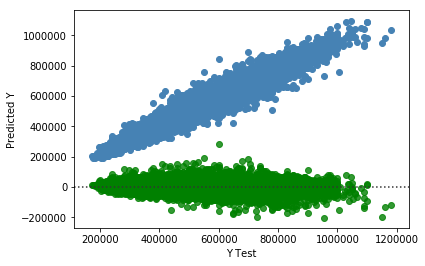

In [105]:
#--------------------------------------------------------------------#
# Checking for NaN values in the output of Random Forest Model:
# (Using Dictionary approach - This one works good for yPrediction, but fails for yTest)
#--------------------------------------------------------------------#

# When added in Dataframe as follows, it shows no null values:

check_df_2 = pd.DataFrame(
   {'uniqueID': xTest.uniqueID.values,
    'Index': xTest.index,
    'yTest': yTest.values,
    'yPred': yPrediction
   })

print("Check isna() for the new DF:")
print(check_df_2.isna().sum())
#check_df_2.isna().sum()

print("\nCheck Min value for yPred:")
print(check_df_2.yPred.values.min())
#check_df_2.isna().sum()
print("\nCheck Min value for yTest:")
print(check_df_2.yTest.values.min())

# Just checking residual plot and predicted values w.r.t. to actual yTest Values:
sns.residplot(yTest,y_pred, color="green")
plt.scatter(check_df_2.yTest,check_df_2.yPred, color="steelblue")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [124]:
# The below code won't add any columns to the DF_3.
check_df_3=pd.DataFrame(yTest, columns=["YTEST"])
print(check_df_3.head())


# Strangely enough, the following code now works. It gave me NaN yesterday night.
check_df_3=pd.DataFrame(yTest.values, columns=["YTEST"])
print(check_df_3.head())

# Still the yPredections NaN values can be found in following:
print("\ncheck_df_rf.isna().sum() output:")
print(check_df_rf.isna().sum())
print("\ncheck_df.isna().sum() output:")
print(check_df.isna().sum())

Empty DataFrame
Columns: [YTEST]
Index: []
      YTEST
0  520000.0
1  420000.0
2  480000.0
3  495000.0
4  347000.0

check_df_rf.isna().sum() output:
YTEST        0
YPRED    26982
dtype: int64

check_df.isna().sum() output:
YTEST        0
YPRED    26982
Index        0
dtype: int64


# Store test prediction in .csv file

In [125]:
# Original score for RF:

YPredData = pd.DataFrame(
   {'uniqueID': x.uniqueID.values,
    'resale_price': yPrediction_rand_for
   })
YPredData.to_csv('Prediction.csv',index=False)

"\nYPredData = pd.DataFrame(\n   {'uniqueID': x.uniqueID.values,\n    'resale_price': yPrediction_rand_for\n   })\nYPredData.to_csv('Prediction.csv',index=False)\n"

In [126]:
# Improved RF Score:

YPredData = pd.DataFrame(
   {'uniqueID': x.uniqueID.values,
    'resale_price': yPrediction_rand_for
   })
YPredData.to_csv('Improved_RF_Prediction.csv',index=False)

In [127]:
# Ada-Boost-RF [New Model] Score:

yPrediction_Ada_RF = ada_regr.predict(x)

YPredData = pd.DataFrame(
   {'uniqueID': x.uniqueID.values,
    'resale_price': yPrediction_Ada_RF
   })
YPredData.to_csv('New_Ada_Boost_Prediction.csv',index=False)

In [128]:
# XGBoost [New Model] Score:

yPrediction_XGB = model.predict(x)

YPredData = pd.DataFrame(
   {'uniqueID': x.uniqueID.values,
    'resale_price': yPrediction_XGB
   })
YPredData.to_csv('New_XGBoost_Prediction.csv',index=False)

# Conclusion:

- Originally, we had seen that the Random forest gave us the best accuracy in Validation Test (26000). Hence, same was used in test prediction.
- Improved scores are as follows:
    1. Original Score: 26000
    2. Improved RF: 25846.288
    3. Ada-Boost RF: 25273.716
    4. XGBoost: 24244.787
- Therefore, XGBoost can be considered as best model now. 

# Future Scope:

- Try for more enhancements in feature engineering steps. Tune the parameters for the model.